## Problem Statement: 

1) Study the effect of different factors mentioned in Data to study the prices of AirBnB properties in NewYork. 
2) Run a Multiple Linear Regression Model to check which factors have a significant effect on the prices.


In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import researchpy as rp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
print(mpl.__version__)

3.1.0


In [5]:
data1 = pd.read_excel(r'C:\LinearModel\AirBnB.xlsx')
data1

C:\Users\Gauri\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16
0,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,NaN
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0,NaN
5,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188,NaN
6,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6,NaN
7,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39,NaN
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314,NaN
9,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333,NaN


In [6]:
data1.shape

(48891, 17)

In [7]:
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16
0,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,NaN
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0,NaN


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48891 entries, 0 to 48890
Data columns (total 17 columns):
id                                48891 non-null int64
name                              48865 non-null object
host_id                           48891 non-null int64
host_name                         48869 non-null object
neighbourhood_group               48891 non-null object
neighbourhood                     48891 non-null object
latitude                          48891 non-null float64
longitude                         48891 non-null float64
room_type                         48891 non-null object
price                             48891 non-null int64
minimum_nights                    48891 non-null int64
number_of_reviews                 48891 non-null int64
last_review                       38840 non-null object
reviews_per_month                 38840 non-null float64
calculated_host_listings_count    48891 non-null int64
availability_365                  48891 non-null int64

In [9]:
data1.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
data1.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [11]:
print(data1.isnull().sum())

id                                    0
name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
Unnamed: 16                       48890
dtype: int64


In [12]:
(data1['last_review'].isnull() == data1['reviews_per_month'].isnull()).all()

True

In [13]:
data1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16
0,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,NaN
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0,NaN
5,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188,NaN
6,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6,NaN
7,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39,NaN
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314,NaN
9,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333,NaN


In [14]:
data1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16
0,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,NaN
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0,NaN
5,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188,NaN
6,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6,NaN
7,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39,NaN
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314,NaN
9,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333,NaN


In [15]:
data1.loc[data1['reviews_per_month'].isnull(),'reviews_per_month']=0
data1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16
0,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,NaN
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0,NaN
5,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188,NaN
6,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6,NaN
7,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39,NaN
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314,NaN
9,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333,NaN


In [16]:
data1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889100e+04,4.889100e+04,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000
mean,1.901870e+07,6.762554e+07,40.728949,-73.952169,152.720644,7.030415,23.269743,1.090892,7.144362,112.764394
std,1.098221e+07,7.861180e+07,0.054529,0.046158,240.163598,20.511326,44.538149,1.597252,32.953835,131.612715
min,5.022000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.473742e+06,7.824337e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967775e+07,3.080105e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915256e+07,1.074344e+08,40.763115,-73.936270,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
data2 = data1.copy()

In [18]:
data2[data2.price != 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16
0,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,NaN
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0,NaN
5,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188,NaN
6,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6,NaN
7,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39,NaN
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314,NaN
9,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333,NaN


In [19]:
data2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889100e+04,4.889100e+04,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000
mean,1.901870e+07,6.762554e+07,40.728949,-73.952169,152.720644,7.030415,23.269743,1.090892,7.144362,112.764394
std,1.098221e+07,7.861180e+07,0.054529,0.046158,240.163598,20.511326,44.538149,1.597252,32.953835,131.612715
min,5.022000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.473742e+06,7.824337e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967775e+07,3.080105e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915256e+07,1.074344e+08,40.763115,-73.936270,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [20]:
data3 = data2.copy()

In [21]:
data4 = data3.copy()

In [22]:
data5 = data4[data4.price != 0]
data5

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16
0,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,NaN
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0,NaN
5,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188,NaN
6,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6,NaN
7,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39,NaN
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314,NaN
9,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333,NaN


In [23]:
data5.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888000e+04,4.888000e+04,48880.000000,48880.000000,48880.000000,48880.000000,48880.000000,48880.000000,48880.000000,48880.000000
mean,1.901835e+07,6.762757e+07,40.728953,-73.952175,152.755012,7.030340,23.267267,1.090782,7.145008,112.762561
std,1.098342e+07,7.861750e+07,0.054531,0.046160,240.179691,20.513001,44.538895,1.597182,32.957501,131.617696
min,5.022000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471971e+06,7.822844e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967620e+07,3.079915e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915325e+07,1.074344e+08,40.763120,-73.936288,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
data6 = data5.copy()
data7 = data6[data6.minimum_nights <= 365]

In [25]:
data7.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.886600e+04,4.886600e+04,48866.000000,48866.000000,48866.000000,48866.000000,48866.000000,48866.000000,48866.000000,48866.000000
mean,1.902004e+07,6.763539e+07,40.728953,-73.952171,152.759362,6.840748,23.272418,1.091052,7.146666,112.711497
std,1.098303e+07,7.862089e+07,0.054533,0.046164,240.208798,16.453678,44.543952,1.597323,32.962069,131.586910
min,5.022000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.473850e+06,7.824337e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967743e+07,3.080454e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915476e+07,1.074344e+08,40.763127,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


In [26]:
data7.shape

(48866, 17)

In [27]:
set(data7['neighbourhood_group'])

{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

In [28]:
data7.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,87.577064,106.725371,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20087.0,124.452780,186.931170,10.0,60.0,90.0,150.0,10000.0
Manhattan,21652.0,196.888879,291.434380,10.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.493997,167.125802,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [29]:
data7.pivot_table(index = 'neighbourhood_group', columns = 'room_type', values = 'price', aggfunc = 'mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.366196,76.546389,50.773723
Manhattan,249.278199,116.772460,88.933194
Queens,147.031996,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [30]:
for gp in set(data7['neighbourhood_group']):
    print(data7.loc[data7['neighbourhood_group']==gp,].groupby(['neighbourhood_group','neighbourhood']).agg({'price':['count','mean']}).sort_values(by=('price', 'mean'),ascending=False).head())
    print()

                                   price       
                                   count   mean
neighbourhood_group neighbourhood              
Staten Island       Fort Wadsworth     1  800.0
                    Woodrow            1  700.0
                    Prince's Bay       4  409.5
                    Randall Manor     19  336.0
                    Willowbrook        1  249.0

                                   price            
                                   count        mean
neighbourhood_group neighbourhood                   
Bronx               Riverdale         11  442.090909
                    City Island       18  173.000000
                    Spuyten Duyvil     4  154.750000
                    Eastchester       13  141.692308
                    Unionport          7  137.142857

                                      price            
                                      count        mean
neighbourhood_group neighbourhood                      
Manhattan           Tr

In [31]:
data7.groupby('neighbourhood_group')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,4.563303,15.638775,1.0,1.0,2.0,3.0,365.0
Brooklyn,20087.0,5.895057,14.534026,1.0,2.0,3.0,5.0,365.0
Manhattan,21652.0,8.346204,18.824939,1.0,1.0,3.0,6.0,365.0
Queens,5664.0,5.010240,11.952636,1.0,1.0,2.0,3.0,365.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


C:\Users\Gauri\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


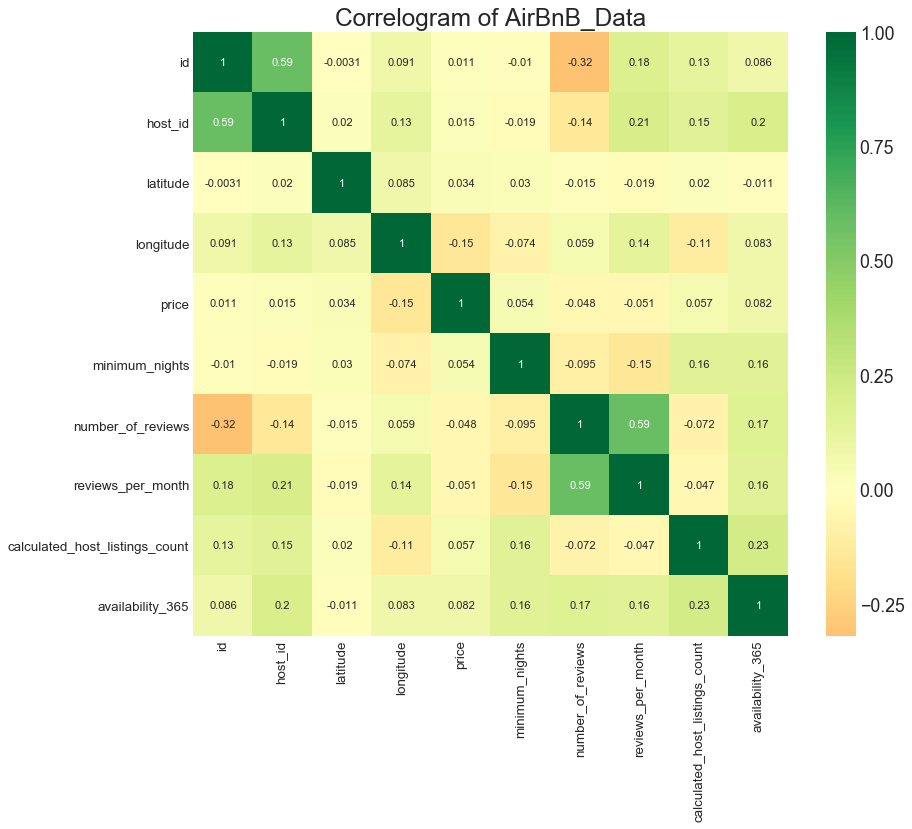

In [32]:
plt.figure(figsize = (12,10), dpi = 80)
sns.heatmap(data7.corr(), cmap = 'RdYlGn', center = 0, annot = True)
plt.title('Correlogram of AirBnB_Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [33]:
rp.summary_cont(data7[['longitude','latitude','price','minimum_nights','reviews_per_month','number_of_reviews','calculated_host_listings_count','availability_365']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,longitude,48866.0,-73.952171,0.046164,0.000209,-73.952581,-73.951762
1,latitude,48866.0,40.728953,0.054533,0.000247,40.728469,40.729436
2,price,48866.0,152.759362,240.208798,1.086640,150.629535,154.889190
3,minimum_nights,48866.0,6.840748,16.453678,0.074432,6.694861,6.986636
4,reviews_per_month,48866.0,1.091052,1.597323,0.007226,1.076889,1.105215
5,number_of_reviews,48866.0,23.272418,44.543952,0.201505,22.877467,23.667370
6,calculated_host_listings_count,48866.0,7.146666,32.962069,0.149111,6.854406,7.438927
7,availability_365,48866.0,112.711497,131.586910,0.595264,111.544773,113.878221


In [34]:
rp.summary_cat(data7[['neighbourhood_group','room_type']])

,Variable,Outcome,Count,Percent
0,neighbourhood_group,Manhattan,21652,44.31
1,,Brooklyn,20087,41.11
2,,Queens,5664,11.59
3,,Bronx,1090,2.23
4,,Staten Island,373,0.76
5,room_type,Entire home/apt,25396,51.97
6,,Private room,22313,45.66
7,,Shared room,1157,2.37


In [49]:
data8=data7.copy()

In [50]:
data8 = data8[['longitude', 'latitude', 'price','number_of_reviews', 'availability_365','minimum_nights', 'room_type', 'neighbourhood_group']]

In [67]:
data9 = pd.get_dummies(data8)
data9.head()

,longitude,latitude,price,number_of_reviews,availability_365,minimum_nights,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,-73.94399,40.79851,80,9,0,10,1,0,0,0,0,1,0,0
1,-73.97500,40.74767,200,74,129,3,1,0,0,0,0,1,0,0
2,-73.95596,40.68688,60,49,0,45,0,1,0,0,1,0,0,0
3,-73.98493,40.76489,79,430,220,2,0,1,0,0,0,1,0,0
4,-73.96723,40.80178,79,118,0,2,0,1,0,0,0,1,0,0


In [76]:
data9.columns = ['longitude', 'latitude', 'price', 'number_of_reviews', 'availability_365', 'minimum_nights', 'room_type_Entire_home_apt', 'room_type_Private_room', 'room_type_Shared_room', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten_Island']
data9.head()

,longitude,latitude,price,number_of_reviews,availability_365,minimum_nights,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten_Island
0,-73.94399,40.79851,80,9,0,10,1,0,0,0,0,1,0,0
1,-73.97500,40.74767,200,74,129,3,1,0,0,0,0,1,0,0
2,-73.95596,40.68688,60,49,0,45,0,1,0,0,1,0,0,0
3,-73.98493,40.76489,79,430,220,2,0,1,0,0,0,1,0,0
4,-73.96723,40.80178,79,118,0,2,0,1,0,0,0,1,0,0


In [77]:
data9.head(1)

,longitude,latitude,price,number_of_reviews,availability_365,minimum_nights,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten_Island
0,-73.94399,40.79851,80,9,0,10,1,0,0,0,0,1,0,0


In [78]:
data10 = data9.copy()
data10.head(2)

,longitude,latitude,price,number_of_reviews,availability_365,minimum_nights,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten_Island
0,-73.94399,40.79851,80,9,0,10,1,0,0,0,0,1,0,0
1,-73.97500,40.74767,200,74,129,3,1,0,0,0,0,1,0,0


In [56]:
model = smf.ols("price ~ longitude + latitude + number_of_reviews + minimum_nights + availability_365 + neighbourhood_group_Bronx + neighbourhood_group_Brooklyn + neighbourhood_group_Manhattan + neighbourhood_group_Staten_Island + neighbourhood_group_Queens + room_type_Entire_home_apt + room_type_Private_room + room_type_Shared_room ", data = data9).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     480.5
Date:                Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                        00:23:38   Log-Likelihood:            -3.3469e+05
No. Observations:               48866   AIC:                         6.694e+05
Df Residuals:                   48854   BIC:                         6.695e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -1.862e+04   2091.811     -8.899      0.000   -2.27e+04   -1.45e+04
longitude                          -492.5342     35.953    -13.699      0.000    -563.003    -422.065
latitude                           -191.5306     31.291     -6.121      0.000    -252.862    -130.199
number_of_reviews                    -0.2919      0.024    -12.281      0.000      -0.338      -0.245
minimum_nights                       -0.0373      0.065     -0.577      0.564      -0.164       0.089
availability_365                      0.1837      0.008     22.258      0.000       0.167       0.200
neighbourhood_group_Bronx         -3692.8960    418.261     -8.829      0.000   -4512.693   -2873.099
neighbourhood_group_Brooklyn      -3723.2464    417.315     -8.922      0.000   -4541.188   -2905.305
neighbourhood_group_Manhattan     -3664.0225    419.560     -8.733      0.000   -4486.366   -2841.679
neighbourhood_group_Staten_Island -3839.1792    421.285     -9.113      0.000   -4664.904   -3013.455
neighbourhood_group_Queens        -3696.1224    415.635     -8.893      0.000   -4510.773   -2881.472
room_type_Entire_home_apt         -6123.0679    697.356     -8.780      0.000   -7489.894   -4756.241
room_type_Private_room            -6228.3792    697.247     -8.933      0.000   -7594.992   -4861.766
room_type_Shared_room             -6264.0194    697.232     -8.984      0.000   -7630.603   -4897.436
==============================================================================
Omnibus:                   110334.624   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        993056869.824
Skew:                          21.457   Prob(JB):                         0.00
Kurtosis:                     700.056   Cond. No.                     1.12e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The Variable minimum_nights is INSIGNIFICANT therefore, it is removed and Regression model run withouth it.

As, F(8,1329)=500.8 
    p-value = 0.00 which is less than 0.05
    Thus we reject the null hypothesis
    There is significant amount of variance
    
As per the above results, error terms do no follow normal distribution
According to Durbin-Watson test, homoscedasticity exists as tha value lies between 1 and 2.

In [65]:
model1 = smf.ols("price ~ longitude + latitude + number_of_reviews + availability_365 + neighbourhood_group_Bronx + neighbourhood_group_Brooklyn + neighbourhood_group_Manhattan + neighbourhood_group_Staten_Island + neighbourhood_group_Queens + room_type_Entire_home_apt + room_type_Private_room + room_type_Shared_room ", data = data9).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     528.6
Date:                Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                        00:54:11   Log-Likelihood:            -3.3469e+05
No. Observations:               48866   AIC:                         6.694e+05
Df Residuals:                   48855   BIC:                         6.695e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -1.856e+04   2089.524     -8.882      0.000   -2.27e+04   -1.45e+04
longitude                          -491.5592     35.913    -13.687      0.000    -561.950    -421.169
latitude                           -191.8787     31.285     -6.133      0.000    -253.199    -130.559
number_of_reviews                    -0.2902      0.024    -12.304      0.000      -0.336      -0.244
availability_365                      0.1827      0.008     22.570      0.000       0.167       0.199
neighbourhood_group_Bronx         -3681.6314    417.802     -8.812      0.000   -4500.528   -2862.735
neighbourhood_group_Brooklyn      -3712.0675    416.861     -8.905      0.000   -4529.121   -2895.014
neighbourhood_group_Manhattan     -3652.8564    419.110     -8.716      0.000   -4474.318   -2831.395
neighbourhood_group_Staten_Island -3827.7567    420.816     -9.096      0.000   -4652.562   -3002.951
neighbourhood_group_Queens        -3684.9463    415.180     -8.876      0.000   -4498.705   -2871.188
room_type_Entire_home_apt         -6104.4067    696.600     -8.763      0.000   -7469.751   -4739.062
room_type_Private_room            -6209.6294    696.484     -8.916      0.000   -7574.746   -4844.513
room_type_Shared_room             -6245.2222    696.464     -8.967      0.000   -7610.301   -4880.143
==============================================================================
Omnibus:                   110320.840   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        992219471.084
Skew:                          21.451   Prob(JB):                         0.00
Kurtosis:                     699.762   Cond. No.                     1.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## MULTICOLLINEARITY

In [59]:
data9.corr()

,longitude,latitude,price,number_of_reviews,availability_365,minimum_nights,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten_Island
longitude,1.000000,0.084813,-0.149930,0.059022,0.082916,-0.073957,-0.192053,0.183553,0.029738,0.221254,0.017562,-0.433474,0.622953,-0.291877
latitude,0.084813,1.000000,0.033890,-0.015269,-0.010884,0.029888,-0.005919,0.004519,0.004647,0.330625,-0.672877,0.590637,0.017080,-0.190948
price,-0.149930,0.033890,1.000000,-0.047919,0.081879,0.053605,0.255797,-0.240232,-0.053515,-0.040988,-0.098452,0.163869,-0.080292,-0.013855
number_of_reviews,0.059022,-0.015269,-0.047919,1.000000,0.172243,-0.095227,-0.010098,0.017209,-0.023198,0.009174,0.017237,-0.045664,0.036030,0.015099
availability_365,0.082916,-0.010884,0.081879,0.172243,1.000000,0.164585,-0.006819,-0.010856,0.057974,0.060933,-0.079806,-0.005455,0.087259,0.057964
minimum_nights,-0.073957,0.029888,0.053605,-0.095227,0.164585,1.000000,0.090739,-0.087359,-0.011966,-0.020907,-0.048019,0.081614,-0.040283,-0.010712
room_type_Entire_home_apt,-0.192053,-0.005919,0.255797,-0.010098,-0.006819,0.090739,1.000000,-0.953561,-0.161992,-0.052000,-0.073620,0.159907,-0.108712,-0.008401
room_type_Private_room,0.183553,0.004519,-0.240232,0.017209,-0.010856,-0.087359,-0.953561,1.000000,-0.142754,0.042644,0.079236,-0.157605,0.100839,0.008347
room_type_Shared_room,0.029738,0.004647,-0.053515,-0.023198,0.057974,-0.011966,-0.161992,-0.142754,1.000000,0.031164,-0.017672,-0.009119,0.026865,0.000261
neighbourhood_group_Bronx,0.221254,0.330625,-0.040988,0.009174,0.060933,-0.020907,-0.052000,0.042644,0.031164,1.000000,-0.126191,-0.134729,-0.054691,-0.013247


Almost all correlations are very weak.
Except that between room_type_Entire home/apt and room_type Private room which is -0.95.

## NORMALITY

Text(0.5, 1.0, 'Model1 Residuals Probability Plot')

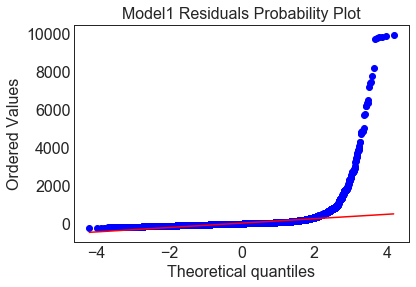

In [60]:
stats.probplot(model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")

The points do not lie on the red line thus we conclude that residuals do not follow a normal distribution.

## Kolmogorov Smirnov Test Goodness of Fit

In [61]:
stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.64053274150986, pvalue=0.0)

Fit is not good

## Heteroscedasticity 

In [62]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 61.29863773399822),
 ('p-value', 1.3074219041777958e-08),
 ('f-value', 6.136181275375664),
 ('f p-value', 2.029958282193581e-09)]

Since, p-value < 0.05, the Null Hypothesis of Homoscedasticity is rejected and Heteroscedasticity is assumed.

# The following function is used to optimize adjusted R-squared by adding features that help the most one at a time until the score goes down or we run out of features.

In [81]:
def forward_selected(data_ult, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data
    response = data10[['price']]

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data_ult.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data_ult).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model_ult = smf.ols(formula, data_ult).fit()
    return model_ult

In [82]:
model_ult = forward_selected(data10, 'price')

print(model_ult.model.formula)

print(model_ult.rsquared_adj)

price ~ room_type_Entire_home_apt + neighbourhood_group_Manhattan + availability_365 + longitude + number_of_reviews + neighbourhood_group_Staten_Island + neighbourhood_group_Queens + latitude + room_type_Private_room + neighbourhood_group_Bronx + 1
0.09744409751298722


## CONCLUSION :

# Thus, our final Multiple Linear Regression model obtained by the OLS Method contains 10 variables out of the 14 variables that we began with.

# The largest R squared value that can be obtained from a Multiple Linear Regression model is 0.09744409751298722.

# Hence, it would be better if we try to fit a Non-Linear Regression model to this data.